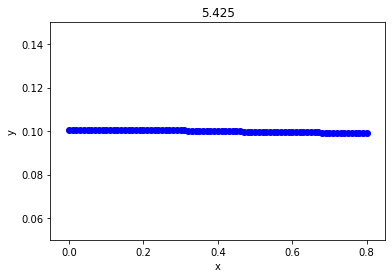

In [ ]:
def check_ita(ita,h):
    if np.abs(ita)>10.*h:
        sys.exit("wave too high")
    return

def exa_sol(L,n,x):
    exa_phi = np.zeros(n)
    exa_u = np.zeros((n,2))
    for i in range(n):
        exa_phi[i] = np.sin(math.pi*(x[i][0]-0.5*L)/L)*np.cosh(math.pi*(x[i][1])/L)
        exa_u[i][0] = (math.pi/L)*np.cos(math.pi*(x[i][0]-0.5*L)/L)*np.cosh(math.pi*(x[i][1])/L)
        exa_u[i][1] = (math.pi/L)*np.sin(math.pi*(x[i][0]-0.5*L)/L)*np.sinh(math.pi*(x[i][1])/L)
    return exa_phi,exa_u

def he_converge():
    he = []
    e = []
    for i in range(7):
        he.append(1./2**i)
        e.append(main(he[i]))
        
    # plot dx vs error in loglog
    plt.loglog(he,e,'-o')
    plt.xlabel("he")
    plt.ylabel("RMS error of potentials")
    
def rmse(n,exa,num):
    e = 0.
    for i in range(n):
        e += (exa[i]-num[i])**2
    e = math.sqrt(e/n)
    return e

def contour_plot(nx,ny,x,sol,exa):
    X = np.zeros(nx)
    Y = np.zeros(ny)
    Z_sol = np.zeros((ny,nx))
    Z_exa = np.zeros((ny,nx))
    for i in range(nx):
        X[i] = x[i][0]
    for i in range(ny):
        Y[i] = x[nx*i][1]
    c = 0
    for i in range(ny):
        for j in range(nx):
            Z_sol[i][j] = sol[c]
            Z_exa[i][j] = exa[c]
            c += 1
            
    plt.contour(X, Y, Z_sol, 20, colors='black')
    plt.contour(X, Y, Z_exa, 20, colors='red')
    #plt.legend(['numerical reults','exact function'])
    
def plotMesh(elements, nodes,l2g=False):
    from matplotlib import pyplot as plt
    plt.figure(figsize=(18,9)); plt.rcParams.update({'font.size': 22})
    for eN, e in enumerate(elements):
        element_nodes = nodes[e[0]], nodes[e[1]], nodes[e[2]]
        X = [n[0] for n in element_nodes]; Y = [n[1] for n in element_nodes]
        cx = sum(X)/3.; cy = sum(Y)/3.
        X.append(element_nodes[0][0]); Y.append(element_nodes[0][1])
        plt.plot(X, Y); #plt.text(cx, cy, "$T_{{{0:d}}}$".format(eN))
        #for n in e:  
        #    plt.text(nodes[n,0], nodes[n,1], "$N_{{{0:d}}}$".format(n))
    #if l2g:
        #plt.text(nodes[n,0], nodes[n,1], "$N_{{ {0:d} = elements[{1:d},{2:d}] = elements[0,1]}}$".format(n,eN,2))
    plt.axis('equal')
    return plt

def mesh(L,h,he,method):
    # element number and size
    nex = int(math.ceil(L/he))
    ney = int(math.ceil(h/he))
    ne = 2*nex*ney
    dx = L/nex
    dy = h/ney
    
    # node number
    nx = nex+1
    ny = ney+1
    n = nx*ny
    
    # mesh method
    if method == 'even':
        xi = np.linspace(0.,L,nx)
        yi = np.linspace(0.,h,ny)
    elif method =='cos':
        xi = np.linspace(0.,L,nx)
        yi = x_cos(0.,h,ny)  
    elif method =='pwr':
        xi = np.linspace(0.,L,nx)
        yi = x_power(0.,h,ny)  
        
    # mesh node
    c = 0
    x = np.zeros((n,2))
    for j in range(ny):
        for i in range(nx):
            x[c][0] = xi[i]
            x[c][1] = yi[j]
            c += 1
    
    mtyp = 3
    if mtyp == 1:
        # local-global index for triangle mesh (left-down right-up)
        c = 0
        ln = np.zeros((ne,3), dtype=int)
        for j in range(ney):
            for i in range(nex):
                ln[2*c][0] = nx*j+i    # lower tri.
                ln[2*c][1] = nx*j+i+1
                ln[2*c][2] = nx*(j+1)+i
                ln[2*c+1][0] = nx*j+i+1     # upper tri.
                ln[2*c+1][1] = nx*(j+1)+1+i
                ln[2*c+1][2] = nx*(j+1)+i          
                c += 1
    elif mtyp == 2:
        # local-global index for triangle mesh (left-up right-down)
        c = 0
        ln = np.zeros((ne,3), dtype=int)
        for j in range(ney):
            for i in range(nex):
                ln[2*c][0] = nx*j+i     # upper tri.
                ln[2*c][1] = nx*(j+1)+1+i
                ln[2*c][2] = nx*(j+1)+i             
                ln[2*c+1][0] = nx*j+i    # lower tri.
                ln[2*c+1][1] = nx*j+i+1
                ln[2*c+1][2] = nx*(j+1)+i+1
                c += 1
    elif mtyp == 3:
        mid = int(nex/2)
        c = 0
        ln = np.zeros((ne,3), dtype=int)
        for j in range(ney):
            for i in range(nex):
                if i < mid:
                    ln[2*c][0] = nx*j+i     # upper tri.
                    ln[2*c][1] = nx*(j+1)+1+i
                    ln[2*c][2] = nx*(j+1)+i             
                    ln[2*c+1][0] = nx*j+i    # lower tri.
                    ln[2*c+1][1] = nx*j+i+1
                    ln[2*c+1][2] = nx*(j+1)+i+1
                    c += 1                
                elif i >= mid:
                    ln[2*c][0] = nx*j+i    # lower tri.
                    ln[2*c][1] = nx*j+i+1
                    ln[2*c][2] = nx*(j+1)+i
                    ln[2*c+1][0] = nx*j+i+1     # upper tri.
                    ln[2*c+1][1] = nx*(j+1)+1+i
                    ln[2*c+1][2] = nx*(j+1)+i          
                    c += 1            
            
    # define global index of the boundary node for solving BVP
    idir = []
    ineu1 = []
    ineu2 = []
    ineu3 = []
    for i in range(n):
        if x[i][1] == h:   # free surface
            idir.append(i)           
        elif x[i][0] == 0: # left wall
            ineu1.append(i)
        elif x[i][0] == L: # right wall
            ineu3.append(i)
        elif x[i][1] == 0: # bottom
            ineu2.append(i)
              
    ndir = len(idir)
    nneu1 = len(ineu1)
    nneu2 = len(ineu2)
    nneu3 = len(ineu3)
    
    # define global index of the free-surface nodes for time marching
    ifs = []
    for i in range(n):
        if x[i][1] == h:   # free surface
            ifs.append(i)  
    nfs = len(ifs)
    
    return nex,ney,ne,nx,ny,n,ln,ndir,idir,nneu1,ineu1,nneu2,ineu2,nneu3,ineu3,ifs,nfs,x

def x_cos(x0,xn,n):
    x = np.zeros(n)
    r = xn-x0
    ds = 0.5*np.pi/(n-1)
    for i in range(n):
        x[i] = x0+r*np.sin(ds*i)
    return x

def x_power(x0,xn,n):
    w = np.power(np.linspace(0,1,n),0.7)
    s = np.sum(w)
    l = xn-x0
    x = np.zeros(n)
    x[0] = x0
    for i in range(n-1):
        x[i+1] = x[i]+l*w[n-1-i]/s
    return x

def loc_divN(): # N is dN/dxi
    N = np.zeros((2,3))
    N1 = np.zeros((2,1))
    N2 = np.zeros((2,1))
    N3 = np.zeros((2,1))
    N1[0][0] = 1.
    N2[1][0] = 1.
    N3[0][0] = -1.
    N3[1][0] = -1.
    N[0][0] = 1.
    N[1][1] = 1.
    N[0][2] = -1.
    N[1][2] = -1
    return N1,N2,N3,N

def loc_NN():
    # NN is local integral of Ni*Nj
    NN = np.zeros((3,3))
    f = lambda y, x: x**2
    s = integrate.dblquad(f, 0, 1, lambda x: 0, lambda x: 1-x)
    NN[0][0] = s[0]
    f = lambda y, x: x*y
    s = integrate.dblquad(f, 0, 1, lambda x: 0, lambda x: 1-x)
    NN[0][1] = s[0]
    f = lambda y, x: x*(1-x-y)
    s = integrate.dblquad(f, 0, 1, lambda x: 0, lambda x: 1-x)
    NN[0][2] = s[0]
    f = lambda y, x: y**2
    s = integrate.dblquad(f, 0, 1, lambda x: 0, lambda x: 1-x)
    NN[1][1] = s[0]
    f = lambda y, x: y*(1-x-y)
    s = integrate.dblquad(f, 0, 1, lambda x: 0, lambda x: 1-x)
    NN[1][2] = s[0]
    f = lambda y, x: (1-x-y)**2
    s = integrate.dblquad(f, 0, 1, lambda x: 0, lambda x: 1-x)
    NN[2][2] = s[0]
    NN[1][0] = NN[0][1]
    NN[2][0] = NN[0][2]
    NN[2][1] = NN[1][2]
    
    # NS is local integral of Ni
    NS = np.zeros(3)
    NS[0] = 1./6.
    NS[1] = 1./6.
    NS[2] = 1./6.
    return NN,NS

def jacobian(N,x):
    jcb_tr = np.dot(N,x)
    invJ = np.linalg.inv(jcb_tr)
    detJ = np.linalg.det(jcb_tr)
    return invJ,detJ

def load_phi(n,ndir,idir,phi):
    F = np.zeros(n)
    for i in idir:
        F[i] = phi[i]
    return F

def local_d(N,NS,invJ):
    d1 = np.zeros((3,3))
    d2 = np.zeros((3,3))
    Nxy = np.dot(invJ,N)
    for i in range(3):
        for j in range(3):
            d1[i][j] = Nxy[0][j]*NS[i]
            d2[i][j] = Nxy[1][j]*NS[i]
    return d1,d2

def local_a(N,invJ,detJ):
    a = np.zeros((3,3))
    temp = np.dot(invJ,N)
    for i in range(3):
        for j in range(3):
            a[i][j] = np.dot(temp[:,i],temp[:,j])*detJ #*0.5 area has been checked
    return a

def assemble(ne,n,ln,ndir,idir,N,x):
    Keff = np.zeros((n,n))
    for i in range(ne):
        # get inverse of JT and determinant of J
        [invJ,detJ] = jacobian(N,x[ln[i][:]][:])
        
        # get local matrices of an element
        loc_a = local_a(N,invJ,detJ)
        
        # assemble local matrices
        for j in range(3):
            for k in range(3):
                Keff[ln[i][j]][ln[i][k]] += loc_a[j][k]
        
    # swap elements to apply Dirichlet BC
    for i in idir:
        Keff[i][:] = 0.
        Keff[i][i] = 1.
    return Keff

def initial_FSBC_slo(n,ndir,idir,L,h,x,u0,a0):
    phi = np.zeros(n)
    phit = np.zeros(n)
    for i in idir:
        phi[i] = 0. #-x[i][0]*u0
    return phi,phit

def initial_FSBC_std(a,n,ndir,idir,L,h,x):
    phi = np.zeros(n)
    phit = np.zeros(n)
    for i in idir:
        phi[i] = a*np.sin(math.pi*(x[i][0]-0.5*L)/L)*np.cosh(math.pi*h/L)
    return phi,phit

def v_c2n(n,ne,ln,u):
    unod = np.zeros((n,2))
    c = np.zeros(n)
    for i in range(ne):
        c[ln[i][0]] += 1.
        c[ln[i][1]] += 1.
        c[ln[i][2]] += 1.
        for j in range(2):
            unod[ln[i][0]][j] += u[i][j]
            unod[ln[i][1]][j] += u[i][j]
            unod[ln[i][2]][j] += u[i][j]
    
    for i in range(n):
        unod[i][0] = unod[i][0]/c[i]
        unod[i][1] = unod[i][1]/c[i]
    return unod

def v_cell(ne,ln,N,x,sol):
    u = np.zeros((ne,2))
    phi = np.zeros(3)
    for i in range(ne):
        # get inverse of JT and determinant of J
        [invJ,detJ] = jacobian(N,x[ln[i][:]][:])
        phi = [sol[ln[i][0]], sol[ln[i][1]], sol[ln[i][2]]]
        u[i][:] = np.dot(invJ,np.dot(N,phi))
    return u

def v_Galerkin(n,ne,ln,N,NN,NS,x,phi):
    unod = np.zeros((n,2))
    C = np.zeros((n,n))
    D1 = np.zeros((n,n))
    D2 = np.zeros((n,n))
    for i in range(ne):
        # get inverse of JT and determinant of J
        [invJ,detJ] = jacobian(N,x[ln[i][:]][:])
        
        # get local matrices of an element
        [d1,d2] = local_d(N,NS,invJ)
        
        # assemble local matrices
        for j in range(3):
            for k in range(3):
                C[ln[i][j]][ln[i][k]] += NN[j][k]*detJ
                D1[ln[i][j]][ln[i][k]] += d1[j][k]*detJ
                D2[ln[i][j]][ln[i][k]] += d2[j][k]*detJ
    # solve u
    b = np.matmul(D1,phi)
    unod[:,0] = np.linalg.solve(C,b)
    # solve v
    b = np.matmul(D2,phi)
    unod[:,1] = np.linalg.solve(C,b)
    return unod

def normal_vector(nfs,ifs,n,x):
    le = np.zeros(nfs-1)
    ne = np.zeros((nfs-1,2))
    normy = np.zeros((nfs,2))
    
    # normal vector of FS side of element
    for i in range(nfs-1): 
        dx = x[ifs[i+1]][0]-x[ifs[i]][0]
        dy = x[ifs[i+1]][1]-x[ifs[i]][1]
        le[i] = np.sqrt(dx**2+dy**2)
        ne[i][0] = -dy/le[i]
        ne[i][1] = dx/le[i]
    
    # nodal normal vector
    normy[0][0] = ne[0][0]
    normy[0][1] = ne[0][1]
    normy[-1][0] = ne[-1][0]
    normy[-1][1] = ne[-1][1]
    for i in range(1,nfs-1): 
        normy[i][0] = (le[i-1]*ne[i-1][0]+le[i]*ne[i][0])/(le[i-1]+le[i])
        normy[i][1] = (le[i-1]*ne[i-1][1]+le[i]*ne[i][1])/(le[i-1]+le[i])         
    return normy

def v_mesh(nfs,ifs,normy,unod,vt):
    vm = np.zeros((nfs,2))
    cv = np.zeros((nfs,2))
    for i in range(nfs):
        vm[i][0] = vt #0. # the mesh velocity has no horizontal velocity
        vm[i][1] = unod[ifs[i]][1]+(unod[ifs[i]][0]-vm[i][0])*normy[i][0]/normy[i][1]
        cv[i][0] = unod[ifs[i]][0]-vm[i][0]
        cv[i][1] = unod[ifs[i]][1]-vm[i][1]
    return vm,cv

def dpdt_mesh(nfs,ifs,dpdt,cv,unod):
    dpdtm = np.zeros(nfs)
    for i in range(nfs):
        dpdtm[i] = dpdt[ifs[i]]-cv[i][0]*unod[ifs[i]][0]-cv[i][1]*unod[ifs[i]][1]
    return dpdtm

def FSBC_phit(grav,h,ifs,n,x,unod,acc):
    dpdt = np.zeros(n)
    phit = np.zeros(n)
    for i in ifs:
        dpdt[i] = 0.5*(unod[i][0]**2+unod[i][1]**2)-grav*(x[i][1]-h) #-x[i][0]*acc
        phit[i] = dpdt[i]-(unod[i][0]**2+unod[i][1]**2)
    return phit,dpdt

def total_phi(n,x,phi,u,v):
    PHI = np.zeros(n)
    for i in range(n):
        PHI[i] = phi[i] + x[i][0]*u + x[i][1]*v
    return PHI

def moving_phi(n,x,PHI,u,v):
    phi = np.zeros(n)
    for i in range(n):
        phi[i] = PHI[i] - x[i][0]*u - x[i][1]*v
    return phi

def bvp_solver(mtd_mesh,mtd_unod,mtd_remesh,mov_wall,vel,acc,grav,h,ne,nx,ny,n,ln,ndir,idir,nfs,ifs,
               nneu1,ineu1,nneu2,ineu2,nneu3,ineu3,N,NN,NS,x,phi):

    # coordinate transformation and assemble local matrices
    Keff = assemble(ne,n,ln,ndir,idir,N,x)
        
    # build load vector that satisfies free-surface BC (Dirichlet phi is given)
    F1 = load_phi(n,ndir,idir,phi)
    
    # build load vector that satisfies wall BC (Neumann pphi is given)
    F2 = load_pphi(mov_wall,n,idir,nneu1,ineu1,nneu3,ineu3,x,vel,vel)
    
    # total load vector
    F = F1+F2
    
    # solve potentialin the non-inertia frame
    phi = np.linalg.solve(Keff,F)
        
    # calculate nodal velocity by averaging cell velocity
    if mtd_unod == 'avg':
        ucel = v_cell(ne,ln,N,x,phi)
        unod = v_c2n(n,ne,ln,ucel)
    elif mtd_unod == 'glk':
        unod = v_Galerkin(n,ne,ln,N,NN,NS,x,phi)
    
    # calculate dpdt and phit on free surface
    [phit,dpdt] = FSBC_phit(grav,h,ifs,n,x,unod,acc)
        
    # return current velocity and dpdt (if ale is used, return mesh velocity and dpdt)
    u_cur = unod
    dpdt_cur = dpdt
        
    # calculate mesh velocity, convective velocity, and time derivative of phi in ALE frame
    if mtd_remesh == 'ale':
        normy = normal_vector(nfs,ifs,n,x)
        [vm,cv] = v_mesh(nfs,ifs,normy,unod,0.)
        dpdtm = dpdt_mesh(nfs,ifs,dpdt,cv,unod)
        u_cur = vm
        dpdt_cur = dpdtm

    return u_cur,dpdt_cur

def remesh_EL(mtd_mesh,dt,nx,ny,n,ifs,x,unod,phi,dpdt):
    # update free-surface node and potential
    new_x = np.zeros((n,2))
    new_phi = np.zeros(n)
    for i in ifs:
        new_x[i][0] = x[i][0]+dt*unod[i][0]
        new_x[i][1] = x[i][1]+dt*unod[i][1]
        new_phi[i] = phi[i]+dt*dpdt[i]
        
    # rezoneing all nodes
    for i in range(nx):
        if mtd_mesh == 'even':
            yi = np.linspace(0.,new_x[ifs[i]][1],ny)
        elif mtd_mesh =='cos':
            yi = x_cos(0.,new_x[ifs[i]][1],ny)
        elif mtd_mesh =='pwr':
            yi = x_power(0.,new_x[ifs[i]][1],ny)
        for j in range(ny):
            c = j*nx+i
            new_x[c][0] = new_x[ifs[i]][0]
            new_x[c][1] = yi[j]
    return new_x,new_phi

def remesh_EL_AB2(mtd_mesh,dt,nx,ny,n,ifs,x,unod,unod2,phi,dpdt,dpdt2):
    # unod is the velocity at kth time step
    # unod2 is the velocity at (k-1)th time step
    # update the position and potential by AB2 method
    new_x = np.zeros((n,2))
    new_phi = np.zeros(n)
    for i in ifs:
        new_x[i][0] = x[i][0]+0.5*dt*(3.*unod[i][0]-unod2[i][0])
        new_x[i][1] = x[i][1]+0.5*dt*(3.*unod[i][1]-unod2[i][1])
        new_phi[i] = phi[i]+0.5*dt*(3.*dpdt[i]-dpdt2[i])
        
    # rezoneing all nodes
    for i in range(nx):
        if mtd_mesh == 'even':
            yi = np.linspace(0.,new_x[ifs[i]][1],ny)
        elif mtd_mesh =='cos':
            yi = x_cos(0.,new_x[ifs[i]][1],ny)
        elif mtd_mesh =='pwr':
            yi = x_power(0.,new_x[ifs[i]][1],ny)
        for j in range(ny):
            c = j*nx+i
            new_x[c][0] = new_x[ifs[i]][0]
            new_x[c][1] = yi[j]
    return new_x,new_phi

def remesh_ALE(mtd_mesh,dt,nx,ny,n,nfs,ifs,x,vm,phi,dpdtm):
    # update free-surface node and potential
    new_x = np.zeros((n,2))
    new_phi = np.zeros(n)
    for i in range(nfs):
        new_x[ifs[i]][0] = x[ifs[i]][0]+dt*vm[i][0]
        new_x[ifs[i]][1] = x[ifs[i]][1]+dt*vm[i][1]
        new_phi[ifs[i]] = phi[ifs[i]]+dt*dpdtm[i]
        
    # rezoneing all nodes
    for i in range(nx):
        if mtd_mesh == 'even':
            yi = np.linspace(0.,new_x[ifs[i]][1],ny)
        elif mtd_mesh =='cos':
            yi = x_cos(0.,new_x[ifs[i]][1],ny)
        elif mtd_mesh =='pwr':
            yi = x_power(0.,new_x[ifs[i]][1],ny)
        for j in range(ny):
            c = j*nx+i
            new_x[c][0] = new_x[ifs[i]][0]
            new_x[c][1] = yi[j]

    return new_x,new_phi

def remesh_ALE_AB2(mtd_mesh,dt,nx,ny,n,nfs,ifs,x,vm,vm2,phi,dpdtm,dpdtm2):
    # update free-surface node and potential
    new_x = np.zeros((n,2))
    new_phi = np.zeros(n)
    for i in range(nfs):
        new_x[ifs[i]][0] = x[ifs[i]][0]+0.5*dt*(3.*vm[i][0]-vm2[i][0])
        new_x[ifs[i]][1] = x[ifs[i]][1]+0.5*dt*(3.*vm[i][1]-vm2[i][1])
        new_phi[ifs[i]] = phi[ifs[i]]+0.5*dt*(3.*dpdtm[i]-dpdtm2[i])

    # rezoneing all nodes
    for i in range(nx):
        if mtd_mesh == 'even':
            yi = np.linspace(0.,new_x[ifs[i]][1],ny)
        elif mtd_mesh =='cos':
            yi = x_cos(0.,new_x[ifs[i]][1],ny)
        elif mtd_mesh =='pwr':
            yi = x_power(0.,new_x[ifs[i]][1],ny)
        for j in range(ny):
            c = j*nx+i
            new_x[c][0] = new_x[ifs[i]][0]
            new_x[c][1] = yi[j]
            
    return new_x,new_phi

def rk4(smth_fs,mtd_mesh,mtd_unod,mtd_remesh,mov_wall,dt,vel0,veln,acc0,accn,grav,h,ne,nx,ny,n,ln,ndir,idir,nfs,ifs,
        nneu1,ineu1,nneu2,ineu2,nneu3,ineu3,N,NN,NS,x,phi):
    # define acc for intermediate step, acc0, acci, accn
    veli = 0.5*(vel0+veln)
    acci = 0.5*(acc0+accn)
    
    if mtd_remesh == 'el': # Lagrangian remesh
        # ki = nodal velocity or dpdt, get k1
        [u1,dpdt1] = bvp_solver(mtd_mesh,mtd_unod,mtd_remesh,mov_wall,vel0,acc0,grav,h,ne,nx,ny,n,ln,ndir,idir,nfs,ifs,
                                nneu1,ineu1,nneu2,ineu2,nneu3,ineu3,N,NN,NS,x,phi)
        [x1,phi1] = remesh_EL(mtd_mesh,0.5*dt,nx,ny,n,ifs,x,u1,phi,dpdt1)
    
        # ki = nodal velocity or dpdt, get k2
        [u2,dpdt2] = bvp_solver(mtd_mesh,mtd_unod,mtd_remesh,mov_wall,veli,acci,grav,h,ne,nx,ny,n,ln,ndir,idir,nfs,ifs,
                                nneu1,ineu1,nneu2,ineu2,nneu3,ineu3,N,NN,NS,x1,phi1)    
        [x2,phi2] = remesh_EL(mtd_mesh,0.5*dt,nx,ny,n,ifs,x,u2,phi,dpdt2)
    
        # ki = nodal velocity or dpdt, get k3
        [u3,dpdt3] = bvp_solver(mtd_mesh,mtd_unod,mtd_remesh,mov_wall,veli,acci,grav,h,ne,nx,ny,n,ln,ndir,idir,nfs,ifs,
                                nneu1,ineu1,nneu2,ineu2,nneu3,ineu3,N,NN,NS,x2,phi2)
        [x3,phi3] = remesh_EL(mtd_mesh,dt,nx,ny,n,ifs,x,u3,phi,dpdt3)    
    
        # ki = nodal velocity or dpdt, get k4
        [u4,dpdt4] = bvp_solver(mtd_mesh,mtd_unod,mtd_remesh,mov_wall,veln,accn,grav,h,ne,nx,ny,n,ln,ndir,idir,nfs,ifs,
                                nneu1,ineu1,nneu2,ineu2,nneu3,ineu3,N,NN,NS,x3,phi3)
        
        # define ki for x and phi on the free surface
        k1x = []; k1y = []; k1p = []; k2x = []; k2y = []; k2p = []
        k3x = []; k3y = []; k3p = []; k4x = []; k4y = []; k4p = []
        for i in range(nfs):
            k1x.append(u1[ifs[i],0])
            k1y.append(u1[ifs[i],1])
            k1p.append(dpdt1[ifs[i]])
            k2x.append(u2[ifs[i],0])
            k2y.append(u2[ifs[i],1])
            k2p.append(dpdt2[ifs[i]])        
            k3x.append(u3[ifs[i],0])
            k3y.append(u3[ifs[i],1])
            k3p.append(dpdt3[ifs[i]])
            k4x.append(u4[ifs[i],0])
            k4y.append(u4[ifs[i],1])
            k4p.append(dpdt4[ifs[i]])        
        
    if mtd_remesh == 'ale': # ALE remesh
        # ki = nodal velocity or dpdt, get k1
        [u1,dpdt1] = bvp_solver(mtd_mesh,mtd_unod,mtd_remesh,mov_wall,vel0,acc0,grav,h,ne,nx,ny,n,ln,ndir,idir,nfs,ifs,
                                nneu1,ineu1,nneu2,ineu2,nneu3,ineu3,N,NN,NS,x,phi)         
        [x1,phi1] = remesh_ALE(mtd_mesh,0.5*dt,nx,ny,n,nfs,ifs,x,u1,phi,dpdt1)
    
        # ki = nodal velocity or dpdt, get k2
        [u2,dpdt2] = bvp_solver(mtd_mesh,mtd_unod,mtd_remesh,mov_wall,veli,acci,grav,h,ne,nx,ny,n,ln,ndir,idir,nfs,ifs,
                                nneu1,ineu1,nneu2,ineu2,nneu3,ineu3,N,NN,NS,x1,phi1)    
        [x2,phi2] = remesh_ALE(mtd_mesh,0.5*dt,nx,ny,n,nfs,ifs,x,u2,phi,dpdt2)
    
        # ki = nodal velocity or dpdt, get k3
        [u3,dpdt3] = bvp_solver(mtd_mesh,mtd_unod,mtd_remesh,mov_wall,veli,acci,grav,h,ne,nx,ny,n,ln,ndir,idir,nfs,ifs,
                                nneu1,ineu1,nneu2,ineu2,nneu3,ineu3,N,NN,NS,x2,phi2)
        [x3,phi3] = remesh_ALE(mtd_mesh,dt,nx,ny,n,nfs,ifs,x,u3,phi,dpdt3)    
    
        # ki = nodal velocity or dpdt, get k4
        [u4,dpdt4] = bvp_solver(mtd_mesh,mtd_unod,mtd_remesh,mov_wall,veln,accn,grav,h,ne,nx,ny,n,ln,ndir,idir,nfs,ifs,
                                nneu1,ineu1,nneu2,ineu2,nneu3,ineu3,N,NN,NS,x3,phi3)    
    
        # define ki for x and phi on the free surface
        k1x = []; k1y = []; k1p = []; k2x = []; k2y = []; k2p = []
        k3x = []; k3y = []; k3p = []; k4x = []; k4y = []; k4p = []
        for i in range(nfs):
            k1x.append(u1[i,0])
            k1y.append(u1[i,1])
            k1p.append(dpdt1[i])
            k2x.append(u2[i,0])
            k2y.append(u2[i,1])
            k2p.append(dpdt2[i])        
            k3x.append(u3[i,0])
            k3y.append(u3[i,1])
            k3p.append(dpdt3[i])
            k4x.append(u4[i,0])
            k4y.append(u4[i,1])
            k4p.append(dpdt4[i])
            
    [new_x,new_phi] = remesh_rk4(smth_fs,mtd_mesh,dt,nx,ny,n,nfs,ifs,k1x,k2x,k3x,k4x,k1y,k2y,k3y,k4y,k1p,k2p,k3p,k4p,x,phi)
    
    return new_x,new_phi

def remesh_rk4(smth_fs,mtd_mesh,dt,nx,ny,n,nfs,ifs,k1x,k2x,k3x,k4x,k1y,k2y,k3y,k4y,k1p,k2p,k3p,k4p,x,phi):  
    # update free-surface node and potential
    new_x = np.zeros((n,2))
    new_phi = np.zeros(n)
    for i in range(nfs):
        new_x[ifs[i]][0] = x[ifs[i]][0]+dt*(k1x[i]+2.*k2x[i]+2.*k3x[i]+k4x[i])/6.
        new_x[ifs[i]][1] = x[ifs[i]][1]+dt*(k1y[i]+2.*k2y[i]+2.*k3y[i]+k4y[i])/6.
        new_phi[ifs[i]] = phi[ifs[i]]+dt*(k1p[i]+2.*k2p[i]+2.*k3p[i]+k4p[i])/6.

    if smth_fs:
        [new_x,new_phi] = smooth(nfs,ifs,new_x,new_phi)
        
    # rezoneing all nodes
    for i in range(nx):
        if mtd_mesh == 'even':
            yi = np.linspace(0.,new_x[ifs[i]][1],ny)
        elif mtd_mesh =='cos':
            yi = x_cos(0.,new_x[ifs[i]][1],ny)
        elif mtd_mesh =='pwr':
            yi = x_power(0.,new_x[ifs[i]][1],ny)
        for j in range(ny):
            c = j*nx+i
            new_x[c][0] = new_x[ifs[i]][0]
            new_x[c][1] = yi[j]        

    return new_x,new_phi


def pressure(tho,grav,h,ic,ifs,n,x,phit,unod):
    patm = tho*(phit[ifs[ic]]+0.5*(unod[ifs[ic]][0]**2+unod[ifs[ic]][1]**2)+grav*(x[ifs[ic]][1]-h))
    p1 = np.zeros(n)
    p2 = np.zeros(n)
    p3 = np.zeros(n)
    p = np.zeros(n)
    for i in range(n):
        p1[i] = tho*phit[i]
        p2[i] = tho*0.5*(unod[i][0]**2+unod[i][1]**2)
        p3[i] = tho*grav*(x[i][1]-h)
        p[i] = p1[i]+p2[i]+p3[i]-patm
    return p

def plot_fig(time,ita,wall_x):
    plt.figure(1)
    plt.plot(time,ita[:,0],'-k',time,ita[:,1],'-r')
    plt.legend(['left-side wall','right-side wall'])
    plt.xlabel('time (s)')
    plt.xlabel('wave elevation on walls (m)')
    plt.savefig('wave_elevation.png')

    return

def fs_animation(t,x,y,L,h):
    display.clear_output(wait=True)
    plt.plot(x,y,'-ob')
    plt.xlim([-0.05, L+0.05])
    plt.ylim([h-0.05, h+0.05])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(str(t))
    plt.show()
    return

def arc_length(nfs,ifs,x,phi):
    # raw free-surface data
    fx = []
    fy = []
    for i in ifs:
        fx.append(x[i][0])
        fy.append(x[i][1])
    
    # calculate arc length
    cs = interp.CubicSpline(fx,fy)
    csder = cs.derivative(1)
    ns = 5*nfs
    xs = np.linspace(fx[0],fx[-1],ns)
    dx = xs[1]-xs[0]
    s = 0.5*dx*(np.sqrt(1.+csder(xs[0])**2)+np.sqrt(1.+csder(xs[-1])**2))
    for i in range(ns-2):
        s += dx*np.sqrt(1.+csder(xs[i+1])**2)
    return s

def cal_mass(ne,ln,x,area_exa):
    a = np.zeros(2)
    b = np.zeros(2)
    area = 0.
    for i in range(ne):
        for j in range(2):
            a[j] = x[ln[i,1],j]-x[ln[i,0],j]
            b[j] = x[ln[i,2],j]-x[ln[i,0],j]
        da = 0.5*np.abs(np.cross(a,b))
        area += da
    err = (area-area_exa)/area_exa*100.
    return err


#************************************************************************
#   CE 7700 project Wen-Huai Tsao 2022 Spring at LSU
#   The ALE-FEM for 2D sloshing problem in potential flow
#************************************************************************
import numpy as np
import math
import random as rd
import sys
from matplotlib import pyplot as plt
from scipy.sparse import csr_matrix,linalg
import scipy.interpolate as interp
from scipy import integrate
#from scipy.sparse.linalg import spsolve
#from cython.parallel import prange
from IPython import display

def main():

#************************************************************************
#     SELECT CASES
#************************************************************************
    # chose example
    exp_name = 'slo' # std = standing wave in stationary tank; slo = sloshing in moving tank
    
    # chose methods
    mtd_mesh = 'pwr' # 'even' or 'cos' or 'pwr'
    mtd_unod = 'glk' # 'avg' or 'glk'
    mtd_remesh = 'el' # 'el' or 'ale'
    mtd_intgr = 'rk4' # 'fir' or 'ab2' or 'rk4'
    smth_fs = True #True # True or False
    mov_wall = np.array([True, True], dtype=bool) # True or False
    
#************************************************************************
#     CONFIGURATIONS
#************************************************************************
    # open files
    wav = open("wav.dat", "w")
    mas = open("mass.dat", "w")
    test = open("test.txt", "w")
    
    # number of threads
    nthrd = 8
    
    # physical constant
    tho = 998.2
    grav = 9.81

    # tank dimensions and 1st-order natural frequency (rad/s)
    L = 0.8
    h = 0.1
    Vw = L*h
    wn = math.sqrt(np.pi*grav*np.tanh(np.pi*h/L)/L)

    # mesh size and time interval
    he = 0.01
    dt = 0.005
    T = 10.
    nt = int(T/dt)+1
    time = np.linspace(0.,T,nt)
    ic = int(L/he/2)+1 # ifs[ic] is the index of free-surce node for Bernoulli constant
        
    # mesh and l2g index
    [nex,ney,ne,nx,ny,n,ln,ndir,idir,nneu1,ineu1,nneu2,ineu2,nneu3,ineu3,ifs,nfs,x] = mesh(L,h,he,mtd_mesh)
    #plotMesh(ln,x)
    #print(idir)
    #print(ineu1)
    #print(ifs)
    
    # build the derivative of shape function
    [N1,N2,N3,N] = loc_divN()
    
    # for nodal velocity by Galerkin method
    [NN,NS] = loc_NN()
    
    # claim for some variables to be saved
    u_cur = np.zeros((n,2))
    dpdt_cur = np.zeros(n)
    u_pre = np.zeros((n,2))
    dpdt_pre = np.zeros(n)
    
#************************************************************************
#     SELECT EXAMPLES
#************************************************************************
    dis = np.zeros(nt)
    vel = np.zeros(nt)
    acc = np.zeros(nt)
        
    if exp_name == 'std': # standing wave by giving initial velocity
        af = 0.01
        # give initial potential on free surface for a standing wave
        [phi,phit] = initial_FSBC_std(af,n,ndir,idir,L,h,x)
        
    elif exp_name == 'slo': # harmonic excitation: x = af*sin(wf*t)
        beta = 0.9
        wf = beta*wn    
        af = 0.0005
        for i in range(nt):
            dis[i] = af*np.sin(wf*dt*i)
            vel[i] = wf*af*np.cos(wf*dt*i)
            acc[i] = -wf*wf*af*np.sin(wf*dt*i)
        # give initial potential on free surface for sloshing problem
        [phi,phit] = initial_FSBC_slo(n,ndir,idir,L,h,x,vel[0],vel[0])
    
    #plt.plot(x[ifs[0:-1],0],phi[ifs[0:-1]])   
    
#************************************************************************
#     TIME MARCHING START
#************************************************************************
    for i in range(nt-1):
        fs_animation(time[i],x[ifs[:],0],x[ifs[:],1],L,h)
        
        # output wave elevation on both side walls
        ita1 = x[ifs[0]][1]-h
        ita2 = x[ifs[-1]][1]-h
        print(time[i],ita1,ita2,file=wav)
        
        # check something
        check_ita(ita1,h) # high wave elevation is prohibited        
        m_err = cal_mass(ne,ln,x,Vw) # calculate the numerical mass err in %
        print(time[i],m_err,file=mas)
        
        # time integration
        if mtd_intgr == 'fir': # 1st-order explicit
            [u_cur,dpdt_cur] = bvp_solver(mtd_mesh,mtd_unod,mtd_remesh,mov_wall,vel[i],acc[i],grav,h,
                                          ne,nx,ny,n,ln,ndir,idir,nfs,ifs,nneu1,ineu1,nneu2,ineu2,nneu3,ineu3,
                                          N,NN,NS,x,phi)
            if mtd_remesh == 'el': # Lagrangian remesh
                [new_x,new_phi] = remesh_EL(mtd_mesh,dt,nx,ny,n,ifs,x,u_cur,phi,dpdt_cur)
            elif mtd_remesh == 'ale': # ALE remesh
                [new_x,new_phi] = remesh_ALE(mtd_mesh,dt,nx,ny,n,nfs,ifs,x,u_cur,phi,dpdt_cur)            
            
        elif mtd_intgr == 'ab2': # AB2
            [u_cur,dpdt_cur] = bvp_solver(mtd_mesh,mtd_unod,mtd_remesh,mov_wall,vel[i],acc[i],grav,h,
                                          ne,nx,ny,n,ln,ndir,idir,nfs,ifs,nneu1,ineu1,nneu2,ineu2,nneu3,ineu3,
                                          N,NN,NS,x,phi)     
            if mtd_remesh == 'el': # Lagrangian remesh with AB2
                [new_x,new_phi] = remesh_EL_AB2(mtd_mesh,dt,nx,ny,n,ifs,x,u_cur,u_pre,phi,dpdt_cur,dpdt_pre)
            elif mtd_remesh == 'ale': # ALE remesh with AB2
                [new_x,new_phi] = remesh_ALE_AB2(mtd_mesh,dt,nx,ny,n,nfs,ifs,x,u_cur,u_pre,phi,dpdt_cur,dpdt_pre)
            u_pre = u_cur
            dpdt_pre = dpdt_cur
            
        elif mtd_intgr == 'rk4': # rk4
            [new_x,new_phi] = rk4(smth_fs,mtd_mesh,mtd_unod,mtd_remesh,mov_wall,dt,vel[i],vel[i+1],acc[i],acc[i+1],grav,h,
                                  ne,nx,ny,n,ln,ndir,idir,nfs,ifs,nneu1,ineu1,nneu2,ineu2,nneu3,ineu3,N,NN,NS,x,phi)

        x = new_x
        phi = new_phi
        
        print(i)
        
        #plotMesh(ln,x)
        #contour_plot(nx,ny,x,phi,np.sqrt(unod[:,0]**2+unod[:,1]**2))


        
    return
#************************************************************************
#     MAIN PROGRAM END
#************************************************************************

def smooth(nfs,ifs,x,phi):
    # smooth factor: 0 = no smooth, larger means smooth alot
    sc = 0.1
    
    # cubic spline smoothing
    spl_x = interp.UnivariateSpline(x[ifs[:],0],x[ifs[:],1])
    spl_x.set_smoothing_factor(sc)
    spl_p = interp.UnivariateSpline(x[ifs[:],0],phi[ifs[:]])
    spl_p.set_smoothing_factor(sc)
    
    # output new node and potential
    fx = np.linspace(x[0,0],x[-1,0],nfs)
    fy = spl_x(fx)
    fp = spl_p(fx)
    for i in range(nfs):
        x[ifs[i],0] = fx[i]
        x[ifs[i],1] = fy[i]
        phi[ifs[i]] = fp[i]
        
    return x,phi

def load_pphi(mov_wall,n,idir,nneu1,ineu1,nneu3,ineu3,x,vt1,vt3):
    
    F = np.zeros(n)
    if mov_wall[0]:
        le = []
        for i in range(nneu1-1):
            le.append(x[ineu1[i+1],1]-x[ineu1[i],1])
        le.append(x[idir[0],1]-x[ineu1[-1],1])
        
        for i in range(nneu1-1):
            F[ineu1[i]] += -0.5*vt1*le[i]
            F[ineu1[i+1]] += -0.5*vt1*le[i]
        F[ineu1[-1]] += -0.5*vt1*le[-1]
            
    if mov_wall[1]:
        le = []
        for i in range(nneu3-1):
            le.append(x[ineu3[i+1],1]-x[ineu3[i],1])
        le.append(x[idir[-1],1]-x[ineu3[-1],1])
        
        for i in range(nneu3-1):
            F[ineu3[i]] += 0.5*vt3*le[i]
            F[ineu3[i+1]] += 0.5*vt3*le[i]
        F[ineu3[-1]] += 0.5*vt3*le[-1]
                  
    return F



#************************************************************************
#     CALL MAIN TO START
#************************************************************************
%time main()

Text(0, 0.5, 'wave elevatoin (m)')

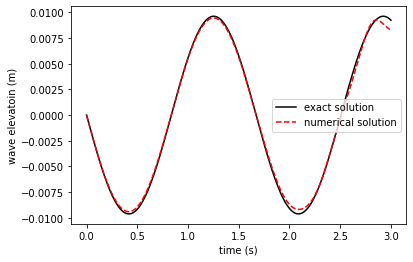

In [18]:
# plot wave elevation of a standing wave
wav = np.loadtxt("wav_std.dat", comments="#", delimiter=" ", unpack=False)
time = np.linspace(0.,3.,600)
af = 0.01
L = 2.
h = 1.
wn = math.sqrt(np.pi*9.81*np.tanh(np.pi*h/L)/L)
wav_exa = []
for i in range(len(time)):
    wav_exa.append(-af*np.pi/(wn*L)*np.sinh(np.pi*h/L)*np.sin(wn*time[i]))

plt.figure(1)
plt.plot(time,wav_exa,'-k',wav[:,0],wav[:,1],'--r')
plt.legend(['exact solution','numerical solution'])
plt.xlabel('time (s)')
plt.ylabel('wave elevatoin (m)')

(0.0, 20.0, -0.003, 0.004)

<Figure size 432x288 with 0 Axes>

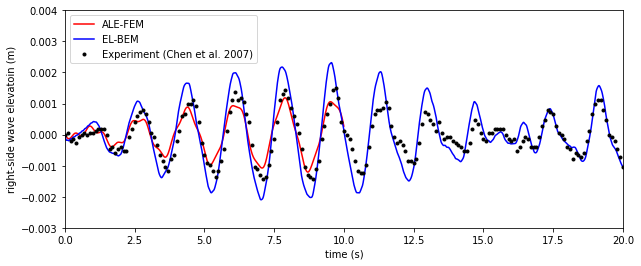

In [53]:
# plot wave elevation of a standing wave
import numpy as np
from matplotlib import pyplot as plt
wav_fem = np.loadtxt("wav.dat", comments="#", delimiter=" ", unpack=False)
wav_bem = np.loadtxt("wav_bem.dat", comments="#", delimiter=" ", unpack=False)
exp = np.loadtxt("ko_slo_exp.dat", comments="#", delimiter="\t", unpack=False)
dn = 10
n = int(len(exp)/dn)
wav_exp = np.zeros((n,2))
for i in range(n):
    wav_exp[i][0] = exp[i*dn,0]
    wav_exp[i][1] = exp[i*dn,1]/100. # exp data is in cm

plt.figure(1)
plt.figure(figsize=(10,4))
plt.plot(wav_fem[:,0],wav_fem[:,2],'-r',wav_bem[:,0],wav_bem[:,2],'-b',wav_exp[:,0],wav_exp[:,1],'.k')
plt.legend(['ALE-FEM','EL-BEM','Experiment (Chen et al. 2007)'],loc=2)
plt.xlabel('time (s)')
plt.ylabel('right-side wave elevatoin (m)')
plt.axis([0, 20, -0.003, 0.004])

#plt.figure(2)
#plt.plot(wav_bem[:,0],wav_bem[:,2],'-b',wav_fem[:,0],wav_fem[:,2],'-r')
#plt.legend(['EL-BEM','ALE-FEM'])
#plt.xlabel('time (s)')
#plt.ylabel('right-side wave elevatoin (m)')

In [ ]:
rm C.gif; ffmpeg -i C%4d.png -v -8 C.gif